In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import pandas as pd
import matplotlib.ticker as ticker
from scipy import stats

data_dir = path.join("/home/katelyn/Documents/COSC490/Stemming/Data","pre-trec")
labels = ["paiceHusk", "krovetz", "sStripping", "porter2", "lovins", "wikt", "none"]

## ADI

,stemmer,map
0,paiceHusk,0.4081
1,krovetz,0.4063
2,sStripping,0.3426
3,porter2,0.4016
4,lovins,0.3964
5,wikt,0.4139
6,none,0.3443


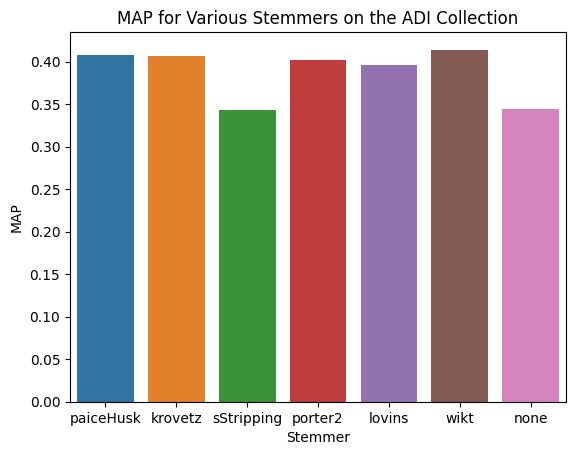

In [35]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"adi-MAP"),sep= "\t",chunksize=36, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the ADI Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [82]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=1.7449239074138156, pvalue=0.09003208489551869, df=34)


In [5]:
#t-test between wikt and sStripping (best and worst)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,s)}")

TtestResult(statistic=1.8777308713624616, pvalue=0.06901797270318381, df=34)


In [6]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=0.49684293752056796, pvalue=0.622497308964628, df=34)


In [38]:
#t-test between porter2 and sStripping
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(p,s)}")

TtestResult(statistic=1.7082984754165358, pvalue=0.09669695781996546, df=34)


## CACM

,stemmer,map
0,paiceHusk,0.2975
1,krovetz,0.3050
2,sStripping,0.2918
3,porter2,0.2900
4,lovins,0.2818
5,wikt,0.2806
6,none,0.2661


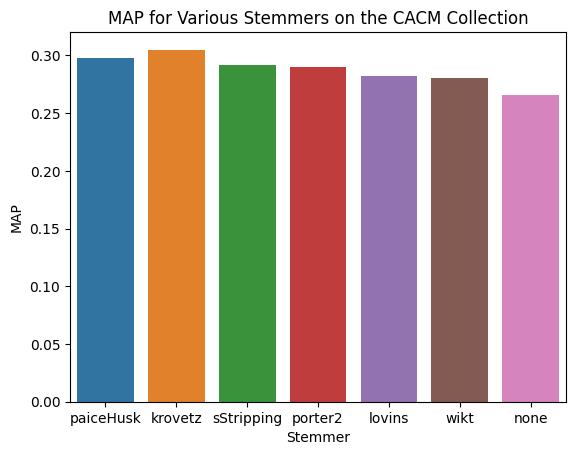

In [39]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"cacm-MAP"),sep= "\t",chunksize=53, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the CACM Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [40]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=0.9801145478974522, pvalue=0.33165628288764526, df=51)


In [44]:
#t-test between krovetz and none (best and worst)
k = data[data["stemmer"] == "krovetz"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(k,n)}")

TtestResult(statistic=2.5617223013679267, pvalue=0.01341420172365411, df=51)


In [43]:
#t-test between wikt and porter2 
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=-0.9247125376501915, pvalue=0.35947033018070984, df=51)


## CISI

,stemmer,map
0,paiceHusk,0.1872
1,krovetz,0.1860
2,sStripping,0.1822
3,porter2,0.1876
4,lovins,0.1856
5,wikt,0.1817
6,none,0.1662


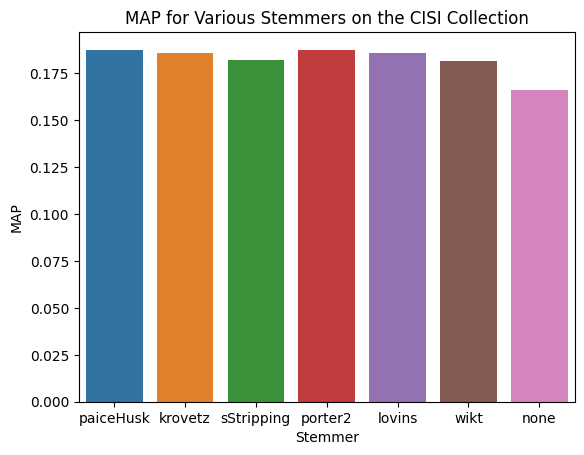

In [48]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"cisi-MAP"),sep= "\t",chunksize=77, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the CISI Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [49]:
#t-test between wikt and none (worst stemmer and no stemming)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=2.7604937098538325, pvalue=0.007250902787154485, df=75)


In [51]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=-1.809967346154518, pvalue=0.0743068232552188, df=75)


## Cranfield

,stemmer,map
0,paiceHusk,0.2905
1,krovetz,0.2916
2,sStripping,0.2752
3,porter2,0.2914
4,lovins,0.2861
5,wikt,0.2854
6,none,0.2661


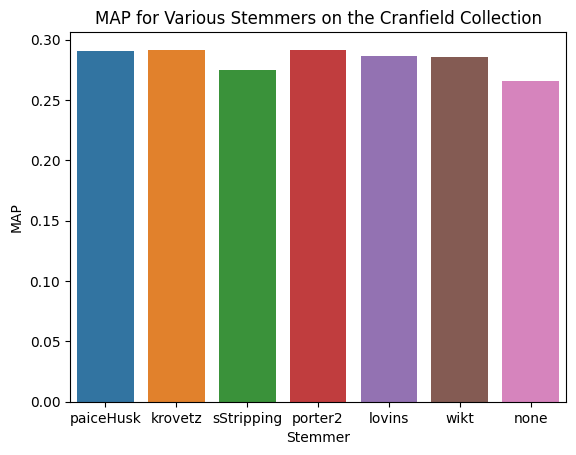

In [52]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"cran-MAP"),sep= "\t",chunksize=226, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the Cranfield Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [53]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=2.355900288033643, pvalue=0.019340979097582447, df=224)


In [54]:
#t-test between krovetz and none (best and worst)
k = data[data["stemmer"] == "krovetz"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(k,n)}")

TtestResult(statistic=3.269729724571371, pvalue=0.001246146666425315, df=224)


In [56]:
#t-test between krovetz and sStripper (best and second worst)
k = data[data["stemmer"] == "krovetz"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(k,s)}")

TtestResult(statistic=2.7013970100529523, pvalue=0.0074330307056552775, df=224)


In [57]:
#t-test between sStripper and none (two lowest)
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=1.682373518184574, pvalue=0.09388982413960291, df=224)


## CysticFibrosis

,stemmer,map
0,paiceHusk,0.2892
1,krovetz,0.2885
2,sStripping,0.2780
3,porter2,0.2875
4,lovins,0.2888
5,wikt,0.2927
6,none,0.2690


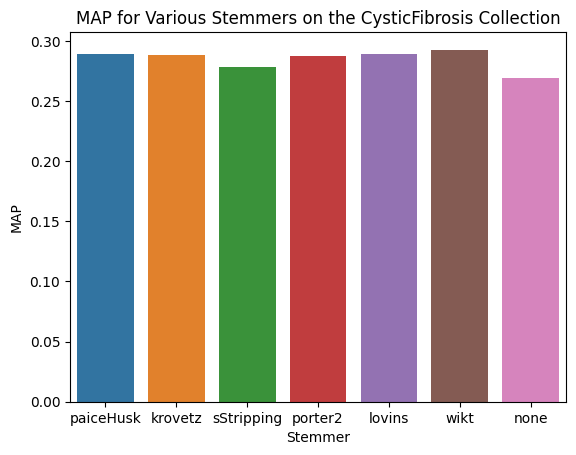

In [61]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"cf-MAP"),sep= "\t",chunksize=101, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the CysticFibrosis Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

### Statistical Significance

In [62]:
#t-test between wikt and none (best and worst)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=4.548887307426953, pvalue=1.5317996324202444e-05, df=99)


In [63]:
#t-test between wikt and sStripping (best and second worst)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,s)}")

TtestResult(statistic=3.5212979047052957, pvalue=0.0006510418165336274, df=99)


In [28]:
#t-test between wikt and porter2 (best and average)
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=1.969272915256034, pvalue=0.05171682719913949, df=99)


### Tuning BM25

,stemmer,defaultMAP,tunedMAP
0,paiceHusk,0.299347,0.300242
1,krovetz,0.295711,0.297918
2,sStripping,0.288334,0.292490
3,porter2,0.297990,0.302762
4,lovins,0.296446,0.303783
5,wikt,0.301400,0.300106
6,none,0.280867,0.285235


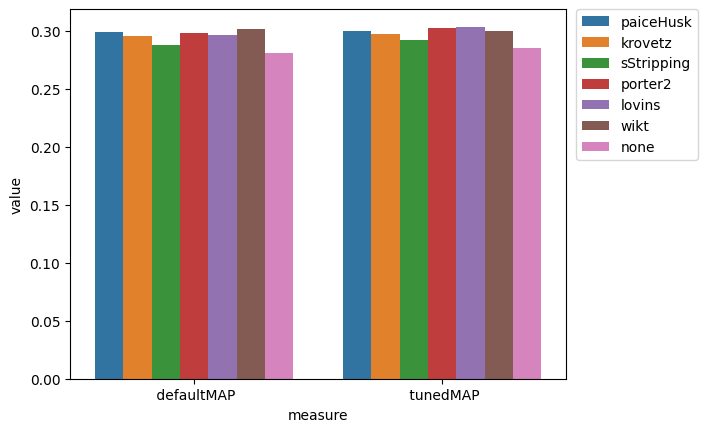

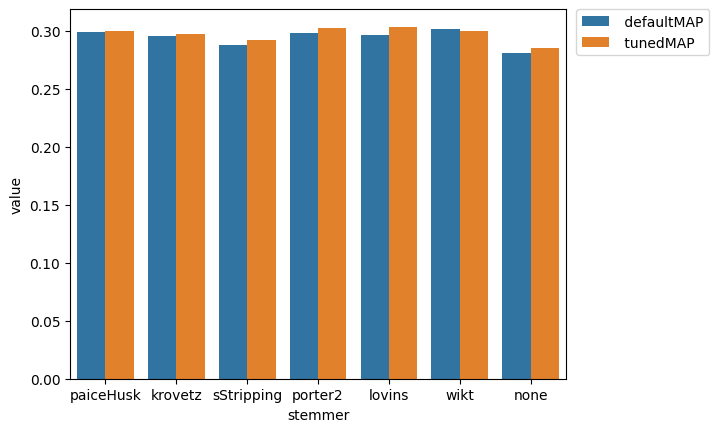

In [10]:
data = pd.read_csv(path.join("BM25","cf.csv"))
display(data)
data = data.melt(id_vars="stemmer").rename({"variable":"measure"}, axis=1)

sns.barplot(data=data, y="value", x="measure", hue="stemmer")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

sns.barplot(data=data, y="value", hue="measure", x="stemmer")
plt.legend(bbox_to_anchor=(1.02,1),loc="upper left",borderaxespad=0)
plt.show()

## LISA

,stemmer,map
0,paiceHusk,0.3301
1,krovetz,0.2997
2,sStripping,0.2713
3,porter2,0.2982
4,lovins,0.2919
5,wikt,0.3053
6,none,0.2680


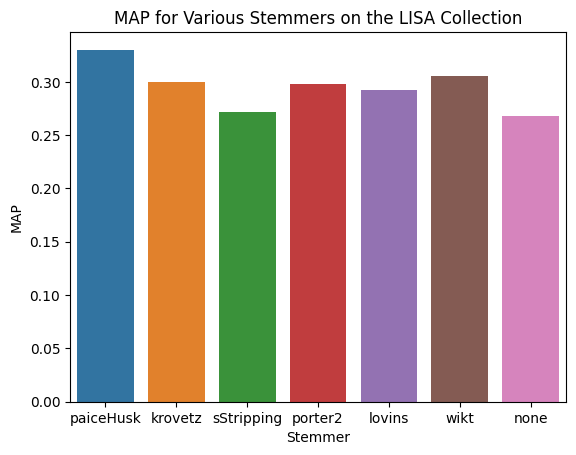

In [89]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"lisa-MAP"),sep= "\t",chunksize=32, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the LISA Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [88]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=2.355485351636764, pvalue=0.02523149470362905, df=30)


In [86]:
#t-test between paiceHusk and none (best and worst)
p = data[data["stemmer"] == "paiceHusk"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(p,n)}")

TtestResult(statistic=1.787347987324497, pvalue=0.0839891476638431, df=30)


In [67]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=0.6318687851203411, pvalue=0.5322586317131052, df=30)


## Medline

,stemmer,map
0,paiceHusk,0.4973
1,krovetz,0.4987
2,sStripping,0.4944
3,porter2,0.5059
4,lovins,0.5105
5,wikt,0.5001
6,none,0.4793


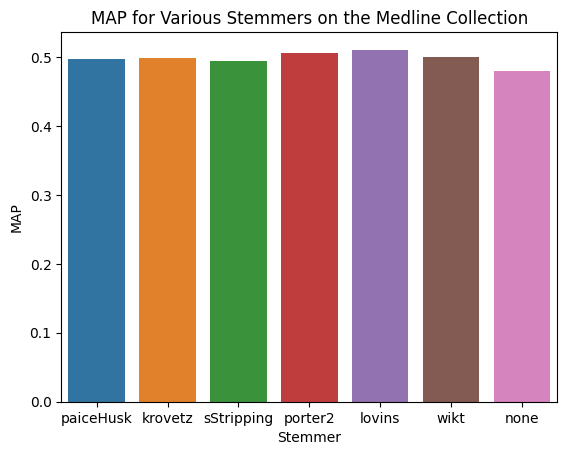

In [68]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"med-MAP"),sep= "\t",chunksize=31, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the Medline Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [70]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=1.66139627043369, pvalue=0.10740854764248106, df=29)


In [72]:
#t-test between lovins and none (best and worst)
l = data[data["stemmer"] == "lovins"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(l,n)}")

TtestResult(statistic=2.1691689341699023, pvalue=0.038408626368699864, df=29)


In [73]:
#t-test between lovins and sStripping (best and lowest stemmer)
l = data[data["stemmer"] == "lovins"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(l,s)}")

TtestResult(statistic=1.1302132631164543, pvalue=0.2676478049568715, df=29)


## NPL

,stemmer,map
0,paiceHusk,0.2752
1,krovetz,0.2790
2,sStripping,0.2670
3,porter2,0.2838
4,lovins,0.2748
5,wikt,0.2820
6,none,0.2215


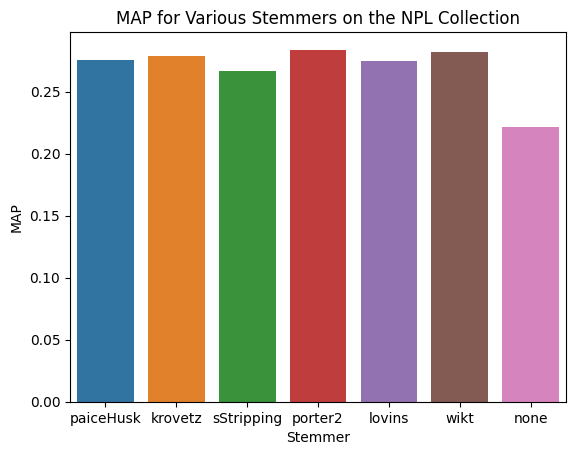

In [74]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"npl-MAP"),sep= "\t",chunksize=94, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the NPL Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [75]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=4.975075546162294, pvalue=3.020791280254699e-06, df=92)


In [76]:
#t-test between porter2 and none (best and worst)
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(p,n)}")

TtestResult(statistic=5.202035859073994, pvalue=1.188162173350786e-06, df=92)


In [77]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=-0.37542841761287443, pvalue=0.7082060646014181, df=92)


In [78]:
#t-test between porter2 and sStripping (best and lowest stemmer)
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(p,s)}")

TtestResult(statistic=1.6299697697626583, pvalue=0.10652712246507329, df=92)


In [79]:
#t-test between sStripping and none (lowest stemmer and none)
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(s,n)}")

TtestResult(statistic=5.173604716906251, pvalue=1.3369876183302565e-06, df=92)


## Time

,stemmer,map
0,paiceHusk,0.5633
1,krovetz,0.5906
2,sStripping,0.5686
3,porter2,0.5710
4,lovins,0.5575
5,wikt,0.5751
6,none,0.5698


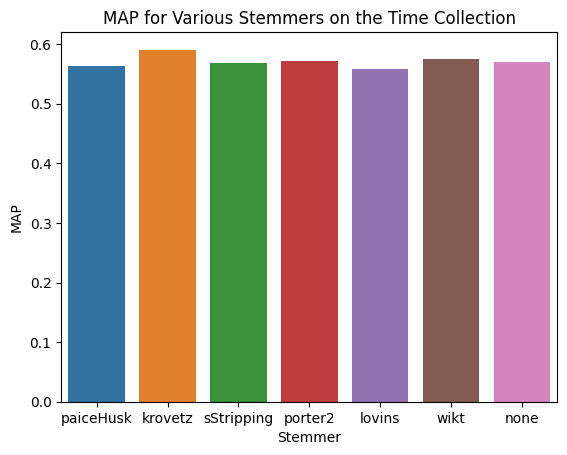

In [80]:
values = list()
chunks = list()
with pd.read_csv(path.join(data_dir,"time-MAP"),sep= "\t",chunksize=84, names=["qid", "map"]) as reader:
    for chunk, stemmer in zip(reader,labels):
        values+=(chunk[chunk["qid"]=="all"].loc[:,"map"].tolist())
        chunk = chunk.drop(chunk[chunk["qid"]=="all"].index)
        chunk["stemmer"] = stemmer
        chunks.append(chunk)
data = pd.concat(chunks)
data_avg = {
    "stemmer" : labels,
    "map" : values
}
data_avg = pd.DataFrame(data=data_avg)
display(data_avg)

sns.barplot(x="stemmer", y="map", data=data_avg)
plt.title("MAP for Various Stemmers on the Time Collection")
plt.xlabel("Stemmer")
plt.ylabel("MAP")
plt.show()

In [83]:
#t-test between wikt and none
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
n = data[data["stemmer"] == "none"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,n)}")

TtestResult(statistic=0.3984666364408729, pvalue=0.6913219051426911, df=82)


In [81]:
#t-test between krovetz and sStripping (best and worst)
k = data[data["stemmer"] == "krovetz"].loc[:,"map"].tolist()
s = data[data["stemmer"] == "sStripping"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(k,s)}")

TtestResult(statistic=1.4349971488619413, pvalue=0.15509115665242415, df=82)


In [82]:
#t-test between wikt and porter2
w = data[data["stemmer"] == "wikt"].loc[:,"map"].tolist()
p = data[data["stemmer"] == "porter2"].loc[:,"map"].tolist()
print(f"{stats.ttest_rel(w,p)}")

TtestResult(statistic=0.4504750935019193, pvalue=0.6535567325942881, df=82)
